In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
n = 100
slots = 5000
tput = []
T = 3
lbd_arr = np.linspace(0,5,100)
p = 0.01

In [0]:
carrier_busy = False
current_sender = -1
finish_time = -1

prob_of_transmission = [1-p, p]

for lbd in lbd_arr:
    num_submission = 0
    num_frame_queued = np.zeros(n, dtype=np.int)
    prob_of_frame_generation = [1-lbd/n , lbd/n]
    carrier_busy = False
    current_sender = -1
    finish_time = -1

    
    for s in range(1,slots+1):
        num_frame_queued += np.random.choice(2, n, p = prob_of_frame_generation)
        do_i_have_enough_frame = (num_frame_queued >= T).astype(np.int)
        
        if carrier_busy:
            num_submission += 1
            if(finish_time == s):
                carrier_busy = False
                current_sender = -1
                finish_time = -1

            
        if not carrier_busy:
            # code for transmission
            can_i_transmit = np.random.choice(2, n, p = prob_of_transmission)
            i_am_sending = np.multiply(do_i_have_enough_frame, can_i_transmit)
            
            if (np.sum(i_am_sending) == 1):
                # no collision
                current_sender = np.argwhere(i_am_sending == 1).reshape(-1)[0]
                num_frame_queued[current_sender] -= T
                finish_time = s + T
                carrier_busy = True

    tput.append(num_submission/slots)

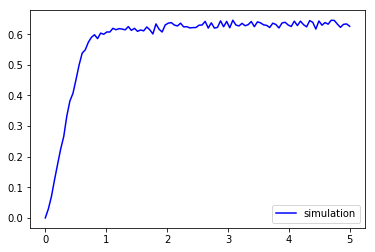

In [7]:
plt.plot(lbd_arr, tput, 'b', label='simulation')
plt.legend()